In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import glob 
import matplotlib.pyplot as plt

In [2]:
train_files=glob.glob("D:/fingers/train/*.png")

In [3]:
train_files[0]

'D:/fingers/train\\00048bba-979b-4f84-b833-5bbbb082b582_0L.png'

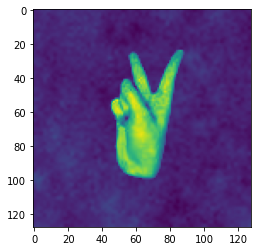

In [4]:
from PIL import Image
im = Image.open(train_files[691])
plt.imshow(im);

In [5]:
from random import shuffle

In [6]:
shuffle(train_files)

In [7]:
train_files[0]

'D:/fingers/train\\9191279f-85d6-47f9-a9e4-ad2dc5d3ceae_1L.png'

In [8]:
im_array=np.array(im)

In [9]:
im_array.shape

(128, 128)

In [10]:
X_train = np.zeros((len(train_files), 128, 128))
Y_train = np.zeros((len(train_files), 12))

In [11]:
for i, trf in enumerate(train_files):
    im = Image.open(trf)
    X_train[i, :, :] = np.array(im)
    Y_train[i, ((trf[-5:-4]>'L')+0)*6+int(trf[-6:-5])] = 1

In [12]:
X_train.shape

(18000, 128, 128)

In [13]:
Y_train.shape

(18000, 12)

In [14]:
Y_train[0]


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
Y_train=np.argmax(Y_train,axis=1) 
Y_train

array([1, 8, 7, ..., 9, 2, 1], dtype=int64)

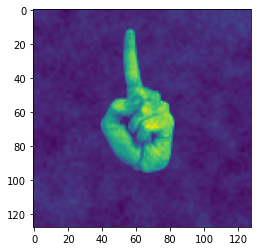

In [16]:
plt.imshow(X_train[0])

In [30]:

test_files=glob.glob("D:/fingers/test/*.png")

X_test = np.zeros((len(test_files), 128, 128))
Y_test = np.zeros((len(test_files), 12))

for i, trf in enumerate(test_files):
    im = Image.open(trf)
    X_test[i, :, :] = np.array(im)
    Y_test[i, ((trf[-5:-4]>'L')+0)*6+int(trf[-6:-5])] = 1
    

In [31]:
from tensorflow import keras


In [32]:
Y_train.shape

(18000,)

In [33]:
X_train=X_train/255.0
X_test=X_test/255.0

X_train=X_train.reshape(len(X_train),128,128,1)
X_test=X_test.reshape(len(X_test),128,128,1)

In [21]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=8, max_value=128, step=8),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(128,128,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=8, max_value=64, step=8),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(12, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model


In [22]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

C:\Users\ashut\AppData\Local\Temp\ipykernel_19992\556418634.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [23]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='fingers',project_name="Fingers")

INFO:tensorflow:Reloading Oracle from existing project fingers\Fingers\oracle.json


In [24]:
tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
120               |?                 |conv_1_filter
3                 |?                 |conv_1_kernel
24                |?                 |conv_2_filter
3                 |?                 |conv_2_kernel
96                |?                 |dense_1_units
0.001             |?                 |learning_rate

Epoch 1/3


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential/conv2d_1/Conv2D/Conv2DBackpropInput' defined at (most recent call last):
    File "C:\Users\ashut\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ashut\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ashut\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ashut\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ashut\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\ashut\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\ashut\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ashut\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ashut\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ashut\AppData\Local\Temp\ipykernel_19992\3097401868.py", line 1, in <cell line: 1>
      tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras_tuner\engine\base_tuner.py", line 179, in search
      results = self.run_trial(trial, *fit_args, **fit_kwargs)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras_tuner\engine\tuner.py", line 294, in run_trial
      obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras_tuner\engine\tuner.py", line 222, in _build_and_fit_model
      results = self.hypermodel.fit(hp, model, *args, **kwargs)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras_tuner\engine\hypermodel.py", line 137, in fit
      return model.fit(*args, **kwargs)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\engine\training.py", line 893, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 537, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 590, in _compute_gradients
      grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
    File "C:\Users\ashut\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 471, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/sequential/conv2d_1/Conv2D/Conv2DBackpropInput'
OOM when allocating tensor with shape[32,120,126,126] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential/conv2d_1/Conv2D/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_895]

In [34]:
model = keras.Sequential([
    keras.layers.Conv2D(
        filters=120,
        kernel_size=3,
        activation='relu',
        input_shape=(128,128,1)
    ),
    keras.layers.Conv2D(
        filters=24,
        kernel_size=3,
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=96,
        activation='relu'
    ),
    keras.layers.Dense(12, activation='softmax')
  ])
  
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  



In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 120)     1200      
                                                                 
 conv2d_5 (Conv2D)           (None, 124, 124, 24)      25944     
                                                                 
 flatten_2 (Flatten)         (None, 369024)            0         
                                                                 
 dense_4 (Dense)             (None, 96)                35426400  
                                                                 
 dense_5 (Dense)             (None, 12)                1164      
                                                                 
Total params: 35,454,708
Trainable params: 35,454,708
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, Y_train, epochs=3, validation_split=0.1,batch_size=2, initial_epoch=0)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
#Y_test=np.argmax(Y_test,axis=1) 
z=model.predict(X_test)

In [ ]:
Y_test=np.argmax(Y_test,axis=1) 

In [ ]:
z=np.argmax(z,axis=1)

In [ ]:
k=abs(Y_test-z)

In [ ]:
k

In [ ]:
sum(k)

In [ ]:
k.shape

In [ ]:
X_train=np.zeros((len(train_files),256,256,3))
Y_train=np.zeros()
for i, ft in enumerate(train_files):
    im=Image.open(ft)
    im_array=np.array(im)
    if(im_array.shape[0]==256&&im_array.shape[1]==256):
        X_train[i,:,:,:]=im_array
        y_train #do this yourself
    
    